In [ ]:
#impoting libraies

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Getting the dataset 

 this dataset is from kaggle 
 
 ## Content:

   ### images original
   A visual representation for each audio file. the audio files were converted to Mel Spectrograms to make this possible.
   
   ### Dataset :
   Containing features of the audio files. Each song (30 seconds long) a mean and variance computed over multiple features that can be extracted from an audio file. 


In [220]:
df = pd.read_csv('https://raw.githubusercontent.com/ZiyadMoh/DataScience-bootcamp-project/main/features_3_sec.csv')
df.label.unique()

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

In [225]:
df

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,rock.00099.5.wav,66149,0.349126,0.080515,0.050019,0.000097,1499.083005,164266.886443,1718.707215,85931.574523,...,42.485981,-9.094270,38.326839,-4.246976,31.049839,-5.625813,48.804092,1.818823,38.966969,rock
9986,rock.00099.6.wav,66149,0.372564,0.082626,0.057897,0.000088,1847.965128,281054.935973,1906.468492,99727.037054,...,32.415203,-12.375726,66.418587,-3.081278,54.414265,-11.960546,63.452255,0.428857,18.697033,rock
9987,rock.00099.7.wav,66149,0.347481,0.089019,0.052403,0.000701,1346.157659,662956.246325,1561.859087,138762.841945,...,78.228149,-2.524483,21.778994,4.809936,25.980829,1.775686,48.582378,-0.299545,41.586990,rock
9988,rock.00099.8.wav,66149,0.387527,0.084815,0.066430,0.000320,2084.515327,203891.039161,2018.366254,22860.992562,...,28.323744,-5.363541,17.209942,6.462601,21.442928,2.354765,24.843613,0.675824,12.787750,rock


## Understanding the Audio Data

In [254]:
# lets see how the audio data for a track looks like 
import librosa
import librosa.display

song_path = './D/genres_original/rock/rock.00020.wav'
# s is a sequence of vibrations
# sr is sample rate which is the rate of of samples of audio pre second in Hz

s, sr = librosa.load(song_path)

In [258]:
print('sequence: ', s, '\n')
print('sample rate (Hz): ', sr)

sequence:  [0.21063232 0.3618164  0.3668213  ... 0.04766846 0.04696655 0.01257324] 

sample rate (Hz):  22050


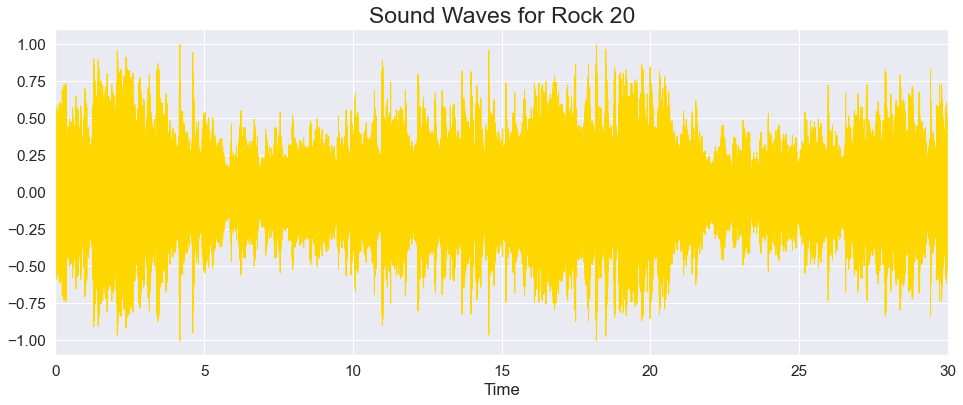

In [265]:
#2d representation 
plt.figure(figsize = (16, 6))
librosa.display.waveplot(y = s, sr = sr, color = "gold");
plt.title("Sound Waves for Rock 20", fontsize = 23)
plt.savefig("Sound Waves rock 20.jpg")

Spectrogram which is A spectrogram is a visual representation of the spectrum of frequencies of a signal as it varies with time.
This is for track: rock 20


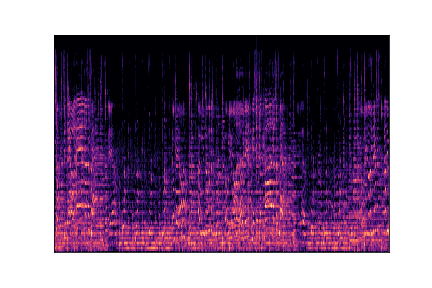

In [266]:
song_path = './D/genres_original/classical/classical.00020.wav'
# s is a sequence of vibrations
# sr is sample rate which is the rate of of samples of audio pre second in Hz

s, sr = librosa.load(song_path)

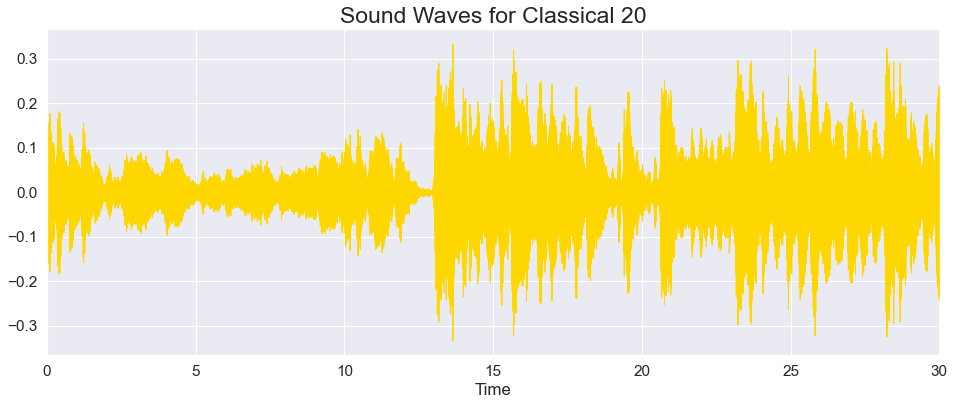

In [268]:
plt.figure(figsize = (16, 6))
librosa.display.waveplot(y = s, sr = sr, color = "gold");
plt.title("Sound Waves for Classical 20", fontsize = 23)
plt.savefig("Sound Waves Classical 20.jpg")

 This is for track: calssical 20

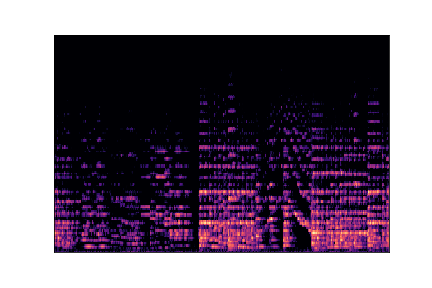

# Visulization

Spliting data into two datasets for visulization (mean and var)

In [269]:
# here I'm going to compere to songs form difrent genres 


cols_var = [col for col in df.columns if '_var' in col]
df_var = df[cols_var]
#

cols_mean = [col for col in df.columns if '_mean' in col]
df_mean = df[cols_mean]
cols = df_mean.columns.unique()

In [ ]:
#pair plot for the df_mean

sns.pairplot(df_mean)

In [ ]:
#pair plot for df_var

sns.pairplot(df_var)

In [ ]:
df_mean

In [ ]:
#normalizing the data 
from sklearn import preprocessing

#scaling the mean df
#mean_label = df_mean['label']
#df_mean.drop(columns='label', inplace=True)
mean_cols = df_mean.columns
mms = preprocessing.MinMaxScaler()
mean_scaled = mms.fit_transform(df_mean)
df_mean= pd.DataFrame(mean_scaled, columns=mean_cols)
#df_mean['label'] = mean_label

#scaling the var df
#var_label = df_var['label']
#df_var.drop(columns='label', inplace=True)
var_cols = df_var.columns
var_scaled = mms.fit_transform(df_var)
df_var= pd.DataFrame(var_scaled, columns=var_cols)
#df_var['label'] = var_label



In [ ]:
# selecting to songs from df_mean and same songs form df_var
mean_s1 = df_mean.iloc[5]
mean_s2 = df_mean.iloc[3706]
print('mean_s1', mean_s1)
print('mean_s2', mean_s2)
var_s1 = df_var.iloc[50]
var_s2 = df_var.iloc[3706]
print('var_s1', var_s1)
print('var_s2', var_s2)

In [ ]:
# getting the labels 
mean_labels = df_mean.loc[:, df_mean.columns != 'label']
mean_labels = list(mean_labels)

var_labels = df_var.loc[:, df_var.columns != 'label']
var_labels = list(var_labels)

In [ ]:
# for mean
angles = np.linspace(0, 2*np.pi, len(mean_labels), endpoint=False)
fig = plt.figure(figsize = (18,18))

ax = fig.add_subplot(221, polar=True)
ax.plot(angles, mean_s1, 'o-', linewidth=2, label = "blues song", color= 'orange')
ax.fill(angles, mean_s1, alpha=0.25, facecolor='orange')
ax.set_thetagrids(angles * 180/np.pi, mean_labels , fontsize = 13)


ax.set_rlabel_position(250)
plt.yticks([0.1 , 0.2 , 0.3 , 0.4, 0.5,  0.6, 0.7, 0.8, 0.9, 1.0], ["0.1",'0.2', "0.3", "0.4", "0.5", "0.6", '0.7', '0.8', '0.9',  '1.0' ], size=12)
plt.ylim(0,1)

ax.plot(angles, mean_s2, 'o-', linewidth=2, label = "disco song", color= 'green')
ax.fill(angles, mean_s2, alpha=0.25, facecolor='green')
ax.set_title('blues VS disco [mean])')
ax.grid(True)

plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))
plt.savefig("radar_plot_(mean).jpg")

In [ ]:
# for var
angles = np.linspace(0, 2*np.pi, len(var_labels), endpoint=False)
fig = plt.figure(figsize = (18,18))

ax = fig.add_subplot(221, polar=True)
ax.plot(angles, var_s1, 'o-', linewidth=2, label = "blues song", color= 'orange')
ax.fill(angles, var_s1, alpha=0.25, facecolor='orange')
ax.set_thetagrids(angles * 180/np.pi, var_labels , fontsize = 13)

ax.set_rlabel_position(250)
plt.yticks([0.1 , 0.2 , 0.3 , 0.4, 0.5,  0.6, 0.7, 0.8, 0.9, 1.0], ["0.1",'0.2', "0.3", "0.4", "0.5", "0.6", '0.7', '0.8', '0.9',  '1.0' ], size=12)
plt.ylim(0,0.6)

ax.plot(angles, var_s2, 'o-', linewidth=2, label = "disco song", color= 'green')
ax.fill(angles, var_s2, alpha=0.25, facecolor='green')
ax.set_title('blues VS disco [var])')
ax.grid(True)
plt.savefig("radar_plot_(var).jpg")

In [ ]:
# ploting other two diffrent songs 
# this time I'll use the mean only because its more readble 
mean_s1 = df_mean.iloc[3433]
mean_s2 = df_mean.iloc[9837]

# to know threre genre I look the songs up in the original dataset
print('label of song 3433:', df.iloc[3433, 59]) # 59 is the label column index
print('label of song 9837:', df.iloc[9837, 59])

In [ ]:

angles = np.linspace(0, 2*np.pi, len(mean_labels), endpoint=False)
fig = plt.figure(figsize = (18,18))

ax = fig.add_subplot(221, polar=True)
ax.plot(angles, mean_s1, 'o-', linewidth=2, label = "disco song", color= 'blue')
ax.fill(angles, mean_s1, alpha=0.25, facecolor='blue')
ax.set_thetagrids(angles * 180/np.pi, mean_labels , fontsize = 13)


ax.set_rlabel_position(250)
plt.yticks([0.1 , 0.2 , 0.3 , 0.4, 0.5,  0.6, 0.7, 0.8, 0.9, 1.0], ["0.1",'0.2', "0.3", "0.4", "0.5", "0.6", '0.7', '0.8', '0.9',  '1.0' ], size=12)
plt.ylim(0,1)

ax.plot(angles, mean_s2, 'o-', linewidth=2, label = "Rock song", color= 'red')
ax.fill(angles, mean_s2, alpha=0.25, facecolor='red')
ax.set_title('disco VS rock)')
ax.grid(True)

plt.legend(loc='best', bbox_to_anchor=(0.1, 0.1))
plt.savefig("disco VS rock.jpg")

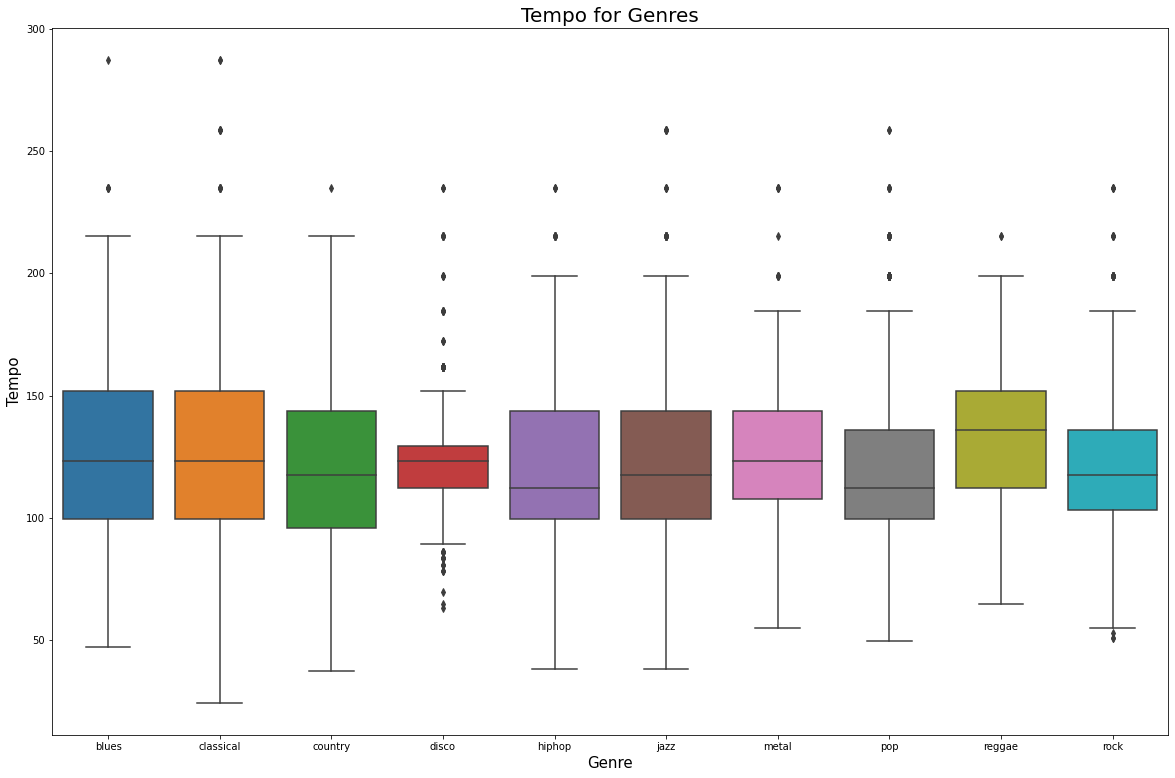

In [119]:
#bar plot for the tempo for each genre in the dataset 
X = df[['label', 'tempo']]
plt.subplots(figsize=(20,13))
sns.boxplot(x = X.label, y = X.tempo, data=X)

plt.title("Tempo for Genres", fontsize=20)
plt.xlabel('Genre', fontsize=15)
plt.ylabel('Tempo', fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.savefig("Tempo for genres.jpg")

In [ ]:
# scatter plot 
# we have to use PCA to reduce the features into two components so that we can plot them 

#removing unissary data

# df.drop(['county_name', 'state'], axis='1', inplace=True)
y = df['label']
X = df.iloc[:, X.columns != 'label']

from sklearn import preprocessing
#we have to scale the dataset befor applying the PCA 
cols = X.columns 
mms = preprocessing.MinMaxScaler()
scaled_data = mms.fit_transform(X)
X = pd.DataFrame(scaled_data, columns= cols)


In [116]:
# applying the PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # two to scatter plot
pcs = pca.fit_transform(X)
pcs_df = pd.DataFrame(data=pcs, columns= ['principal component 1', 'principal component 2'])
pca.explained_variance_ratio_ # the rario of the origenal information the components

array([0.26745621, 0.18238003])

In [120]:
# adding the genres to pca_df 
pcs_df['label'] = y
# now we can plot the data
pcs_df

,principal component 1,principal component 2,label
0,-0.242167,-0.121147,blues
1,-0.276062,-0.230291,blues
2,-0.190024,-0.119509,blues
3,-0.278550,-0.167689,blues
4,-0.309771,-0.187990,blues
...,...,...,...
9985,-0.477372,-0.125390,rock
9986,-0.358180,-0.224792,rock
9987,-0.390216,0.197885,rock
9988,-0.310315,-0.388162,rock


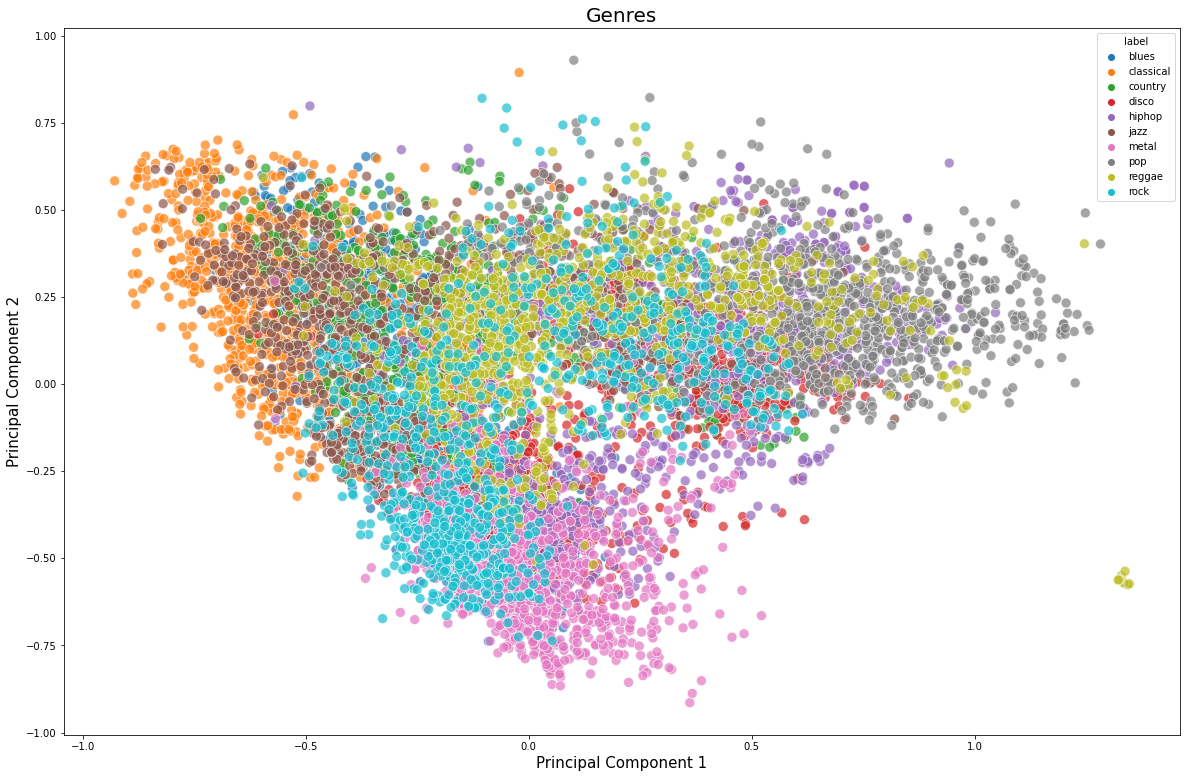

In [121]:
plt.figure(figsize =(20,13))
sns.scatterplot(x= 'principal component 1', y= 'principal component 2', data= pcs_df, hue= 'label', alpha = 0.7,s = 100)

plt.title('Genres', fontsize=20)
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.savefig("Genres Scattert.jpg")


# Data preparation

In [ ]:
# scaling the dataset
y = df['label']
df.drop(columns='label', inplace = True)


cols = df.columns 
mms = preprocessing.MinMaxScaler()
scaled_data = mms.fit_transform(df)
df = pd.DataFrame(scaled_data, columns= cols)


In [236]:
labels =df['label'].unique()
labels

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

In [140]:
# splitting the dataset into train-test sets
from sklearn.model_selection import train_test_split
# I'm going to use 80% of the data to train and 20% to test
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=32)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7992, 57)
(7992,)
(1998, 57)
(1998,)


# Training models 

In [191]:
# I'm going to use two models Random forest and xgboost

from sklearn.ensemble import RandomForestClassifier



rf = RandomForestClassifier(n_estimators = 100, max_depth=1000, n_jobs=-1, random_state=2)



In [193]:
#Random forest
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=1000, n_jobs=-1, random_state=2)

### Evaluaiting the model preformance 

In [156]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [182]:
tcm = cm
tcm.astype('int')

array([[157,   2,   7,   2,   1,   7,   4,   0,   1,   1],
       [  0, 194,   3,   0,   0,   8,   0,   0,   1,   1],
       [ 13,   2, 159,   3,   1,  10,   1,   1,   6,   2],
       [  2,   2,   4, 162,   3,   1,   5,   3,   4,   6],
       [  0,   1,   4,   1, 175,   0,   5,   7,   3,   1],
       [  6,  14,   5,   0,   0, 185,   1,   0,   2,   2],
       [  0,   1,   0,   2,   3,   0, 177,   0,   5,   9],
       [  0,   0,  13,   5,   1,   5,   0, 168,   1,   4],
       [  0,   1,   6,   2,   2,   1,   1,  12, 180,   0],
       [  8,   0,   7,   6,   0,   5,  11,   3,   9, 159]])

In [216]:
rf_y_pred_test = rf.predict(X_test)
accuracy_score(y_test, rf_y_pred_test)

0.8568568568568569

In [217]:
# Confusion Matrix for random forest
cm = confusion_matrix(y_test, rf_y_pred_test)
cm

array([[155,   2,   7,   4,   1,   6,   4,   0,   2,   1],
       [  0, 198,   2,   0,   0,   4,   0,   0,   1,   2],
       [ 16,   2, 154,   2,   0,  11,   2,   2,   4,   5],
       [  2,   2,   2, 168,   2,   3,   3,   2,   4,   4],
       [  3,   0,   3,   3, 171,   1,   2,   8,   4,   2],
       [  6,  17,   4,   0,   1, 182,   1,   0,   0,   4],
       [  2,   1,   0,   0,   2,   0, 180,   0,   5,   7],
       [  1,   0,   9,   4,   1,   5,   0, 168,   4,   5],
       [  0,   1,   9,   4,   2,   1,   0,  12, 174,   2],
       [ 11,   0,   6,   9,   0,   4,  10,   1,   5, 162]], dtype=int64)

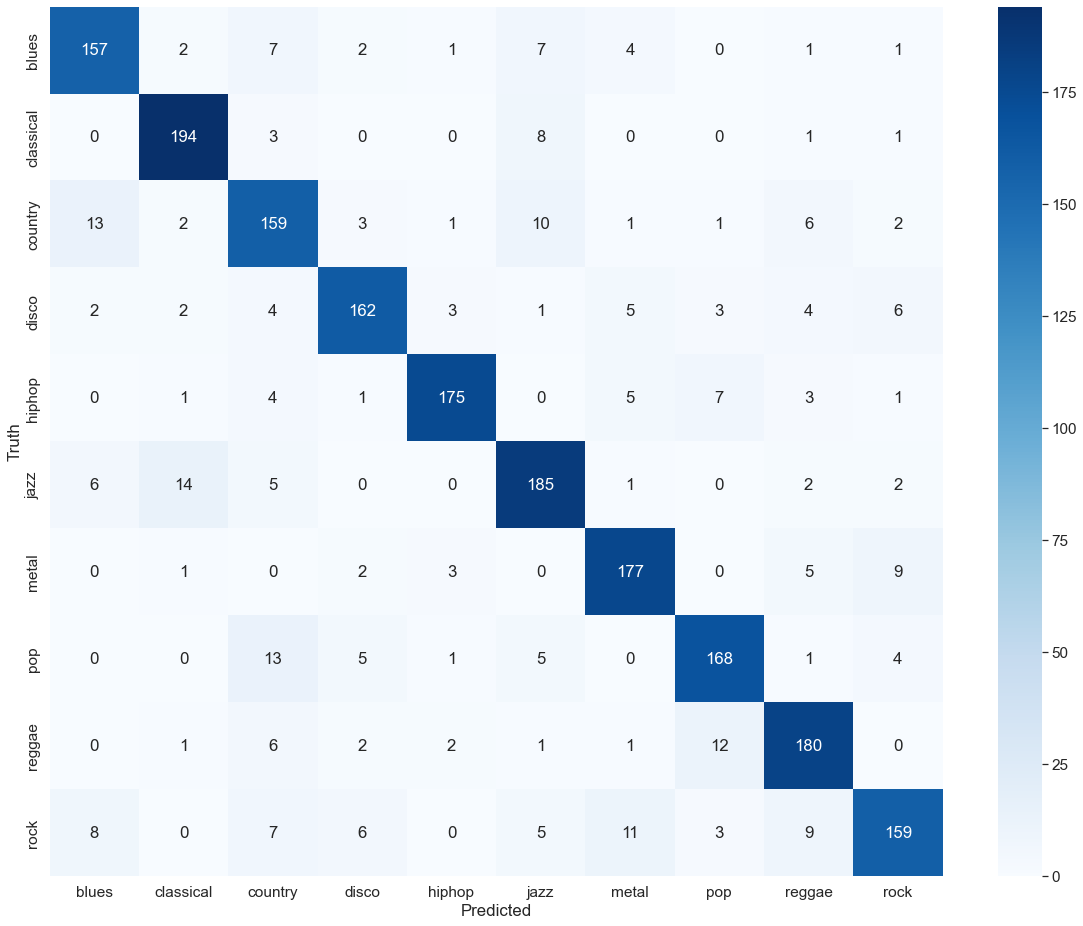

In [218]:


# Build the plot
plt.figure(figsize = (20, 16))
sns.heatmap(tcm, cmap="Blues", annot=True, fmt='.3g',  
            xticklabels = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"],
           yticklabels=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]);
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.savefig("conf matrix")


In [202]:
# xgboost turn 

from xgboost import XGBClassifier

gbm = xgb.XGBClassifier(n_estimators=1000, learning_rate=0.05)

In [204]:
# fitting the model 
fit_model = gbm.fit(X_train, y_train)

[23:11:19] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [205]:
# prediction score
y_pred_test = fit_model.predict(X_test)
accuracy_score(y_test, y_pred_test)

0.9074074074074074

In [206]:
# Confusion Matrix for xgb 
xgb_cm = confusion_matrix(y_test, y_pred_test)
xgb_cm

array([[161,   2,   5,   6,   1,   3,   1,   0,   2,   1],
       [  1, 197,   1,   0,   0,   5,   0,   0,   0,   3],
       [  7,   1, 179,   2,   1,   5,   0,   0,   0,   3],
       [  5,   2,   4, 170,   0,   0,   1,   3,   4,   3],
       [  1,   2,   3,   1, 184,   0,   0,   3,   2,   1],
       [  3,  10,   6,   0,   0, 194,   0,   0,   1,   1],
       [  1,   1,   1,   1,   2,   0, 181,   0,   1,   9],
       [  0,   0,   3,   5,   2,   3,   0, 176,   1,   7],
       [  2,   0,   3,   0,   1,   2,   0,   8, 188,   1],
       [  7,   0,   3,   4,   4,   0,   4,   1,   2, 183]], dtype=int64)

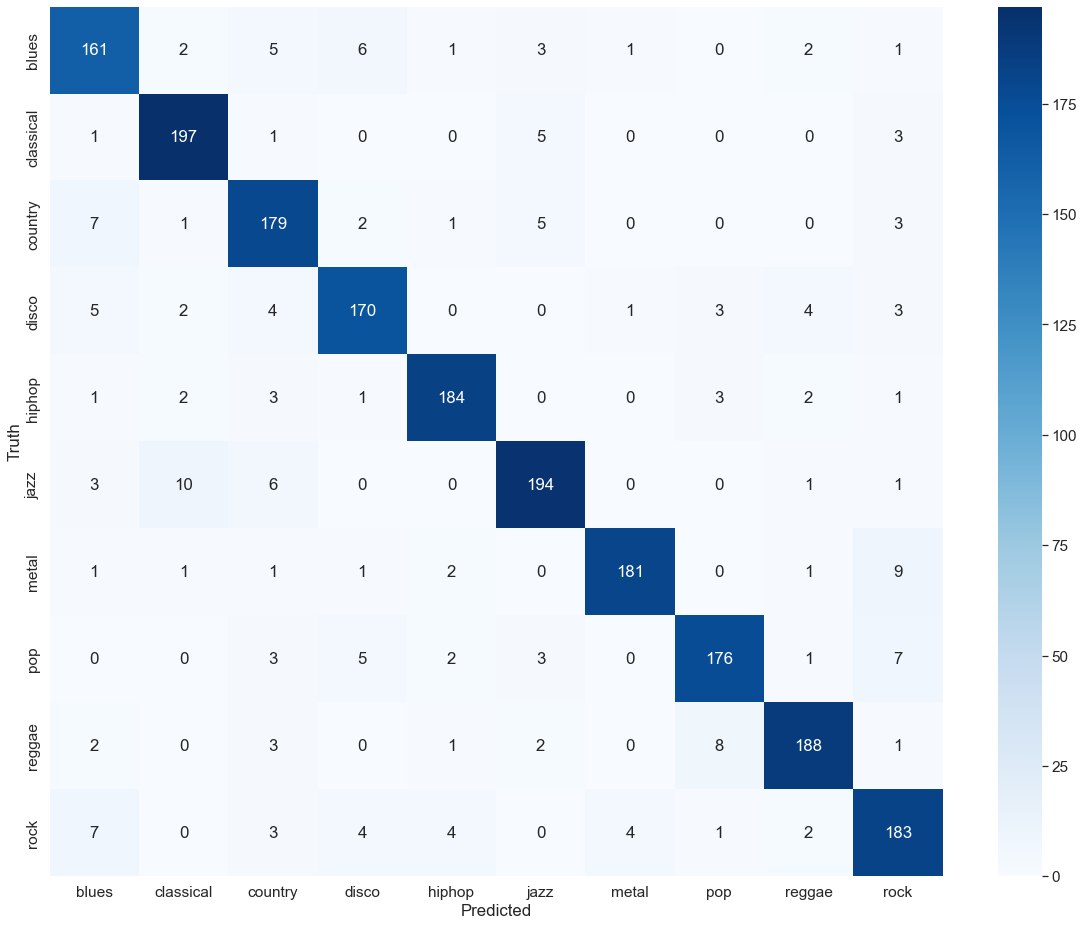

In [219]:
#plotting confusion matrix for xgb

plt.figure(figsize = (20, 16))
sns.heatmap(xgb_cm, cmap="Blues", annot=True, fmt='.3g',  
            xticklabels = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"],
           yticklabels=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]);
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.savefig("conf matrix for xgb")


In [249]:
from sklearn.metrics import f1_score # calcluating the f1 score 

#Random forest

print(f1_score(y_test, rf_y_pred_test, average='weighted'))


#XGB

print(f1_score(y_test, y_pred_test, average='weighted'))

0.8566734383140275
0.9076229387588991


In [250]:
from sklearn.metrics import precision_score
#random fores

print(precision_score(y_test, rf_y_pred_test, average='weighted'))


#XGB

print(precision_score(y_test, y_pred_test, average='weighted'))

0.8575904759557352
0.9082847743160235


In [251]:
from sklearn.metrics import recall_score

#random fores

print(recall_score(y_test, rf_y_pred_test, average='weighted'))


#XGB

print(recall_score(y_test, y_pred_test, average='weighted'))

0.8568568568568569
0.9074074074074074


In [246]:
f1_xgb_df = pd.DataFrame(f1_xgb, labels, columns=['F1-score'])
f1_xgb_df

,F1-score
blues,0.870270
classical,0.933649
country,0.881773
disco,0.892388
hiphop,0.938776
jazz,0.908665
metal,0.942708
pop,0.907216
reggae,0.926108
rock,0.871429


In [245]:
f1_rf_df = pd.DataFrame(f1_rf, labels, columns=['F1-score'])
f1_rf_df

,F1-score
blues,0.820106
classical,0.920930
country,0.781726
disco,0.870466
hiphop,0.907162
jazz,0.842593
metal,0.902256
pop,0.861538
reggae,0.852941
rock,0.805970
